<a href="https://colab.research.google.com/github/alexatthinkcol/one-html-page-challenge/blob/master/bb_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mini Clothing items dataset

In [4]:
import pandas as pd

data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'T-shirts': [100, 120, 150, 130, 160, 170, 180, 190, 200, 210, 220, 230],
    'Jeans': [80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135],
    'Dresses': [50, 60, 70, 65, 75, 80, 85, 90, 95, 100, 110, 120]
}

df = pd.DataFrame(data)
print(df)

   Month  T-shirts  Jeans  Dresses
0    Jan       100     80       50
1    Feb       120     85       60
2    Mar       150     90       70
3    Apr       130     95       65
4    May       160    100       75
5    Jun       170    105       80
6    Jul       180    110       85
7    Aug       190    115       90
8    Sep       200    120       95
9    Oct       210    125      100
10   Nov       220    130      110
11   Dec       230    135      120


Understand trends and patterns in data:

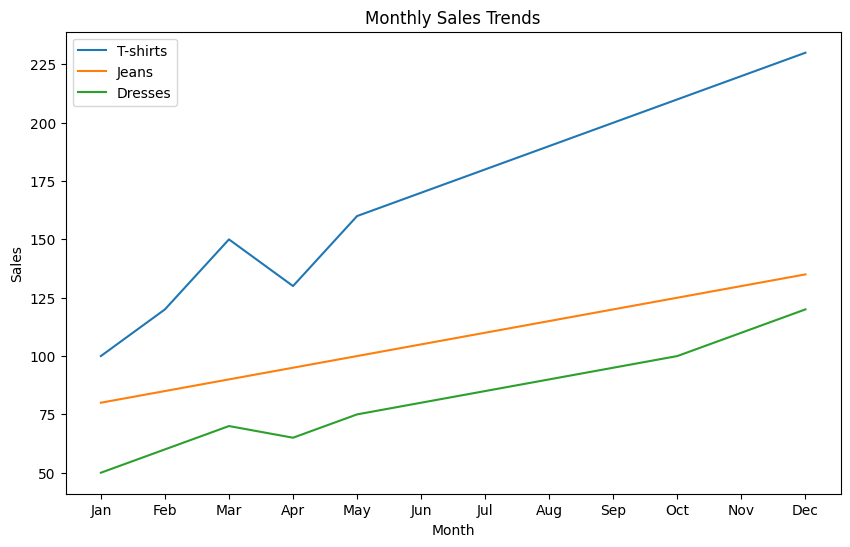

In [5]:
import matplotlib.pyplot as plt

# Plot sales trends
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['T-shirts'], label='T-shirts')
plt.plot(df['Month'], df['Jeans'], label='Jeans')
plt.plot(df['Month'], df['Dresses'], label='Dresses')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trends')
plt.legend()
plt.show()

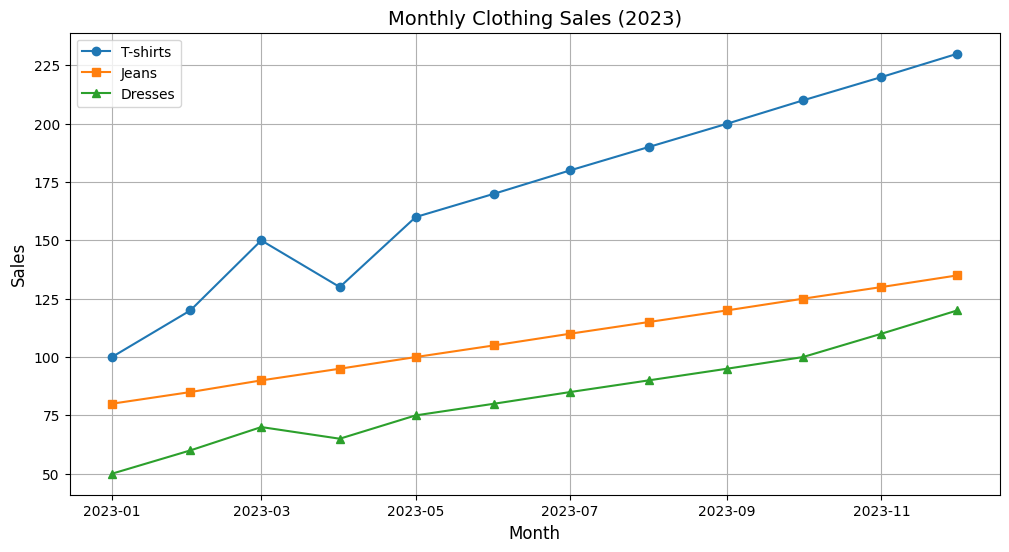

                     Month    T-shirts       Jeans     Dresses
count                   12   12.000000   12.000000   12.000000
mean   2023-06-16 12:00:00  171.666667  107.500000   83.333333
min    2023-01-01 00:00:00  100.000000   80.000000   50.000000
25%    2023-03-24 06:00:00  145.000000   93.750000   68.750000
50%    2023-06-16 00:00:00  175.000000  107.500000   82.500000
75%    2023-09-08 12:00:00  202.500000  121.250000   96.250000
max    2023-12-01 00:00:00  230.000000  135.000000  120.000000
std                    NaN   41.083802   18.027756   20.816660
          T-shirts     Jeans   Dresses
T-shirts  1.000000  0.981940  0.986801
Jeans     0.981940  1.000000  0.987148
Dresses   0.986801  0.987148  1.000000


In [19]:

plt.figure(figsize=(12, 6))

# Plot each product
plt.plot(df['Month'], df['T-shirts'], marker='o', label='T-shirts')
plt.plot(df['Month'], df['Jeans'], marker='s', label='Jeans')
plt.plot(df['Month'], df['Dresses'], marker='^', label='Dresses')

# Add labels/title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Monthly Clothing Sales (2023)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

#min, mean, max
stats = df.describe()
print(stats)

#finding correlation
correlation = df[['T-shirts', 'Jeans', 'Dresses']].corr()
print(correlation)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt3nygbwz/fpvoxpyk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt3nygbwz/xxxobbft.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17805', 'data', 'file=/tmp/tmpt3nygbwz/fpvoxpyk.json', 'init=/tmp/tmpt3nygbwz/xxxobbft.json', 'output', 'file=/tmp/tmpt3nygbwz/prophet_modelzyhaici3/prophet_model-20250327072929.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:29:29 - cmdstanpy - INFO - Chain [1] start processing
IN

<bound method NDFrame.head of            ds    y
0  2023-01-01   50
1  2023-02-01   60
2  2023-03-01   70
3  2023-04-01   65
4  2023-05-01   75
5  2023-06-01   80
6  2023-07-01   85
7  2023-08-01   90
8  2023-09-01   95
9  2023-10-01  100
10 2023-11-01  110
11 2023-12-01  120>
           ds
13 2024-01-31
14 2024-02-29
15 2024-03-31
16 2024-04-30
17 2024-05-31
           ds        yhat  yhat_lower  yhat_upper
13 2024-01-31  126.137597  122.029683  130.431369
14 2024-02-29  131.571914  127.212747  135.557802
15 2024-03-31  137.381011  133.205574  141.325439
16 2024-04-30  143.002718  138.882658  147.048128
17 2024-05-31  148.811815  144.822911  152.754739


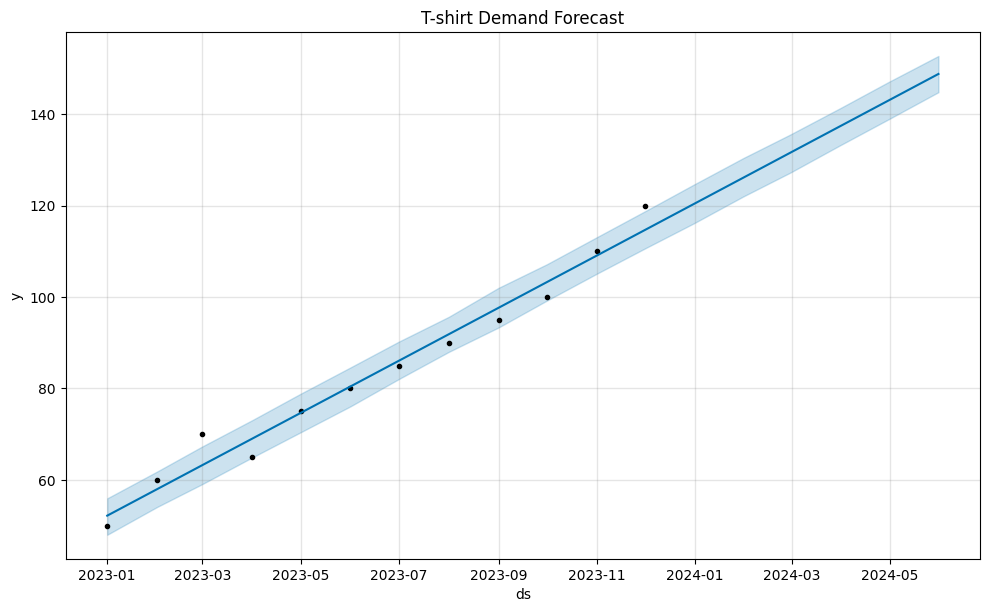

In [24]:
from prophet import Prophet

dresses = df[['Month', 'Dresses']].copy()
dresses.columns = ['ds','y']
print(dresses.head)

d_model = Prophet(seasonality_mode='multiplicative')
d_model.fit(dresses)
d_future = d_model.make_future_dataframe(periods=6, freq='ME')
print(d_future.tail())

d_forecast = d_model.predict(d_future)
print(d_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

fig2 = d_model.plot(d_forecast)
plt.title("Dresses Demand Forecast")
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt3nygbwz/u7rc2m2p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt3nygbwz/vxaktdy9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47400', 'data', 'file=/tmp/tmpt3nygbwz/u7rc2m2p.json', 'init=/tmp/tmpt3nygbwz/vxaktdy9.json', 'output', 'file=/tmp/tmpt3nygbwz/prophet_modelz0mm3nal/prophet_model-20250327073649.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:36:49 - cmdstanpy - INFO - Chain [1] start processing
IN

           ds        yhat  yhat_lower  yhat_upper
13 2024-01-31  145.015058  144.616622  145.428427
14 2024-02-29  149.784441  148.931073  150.608416
15 2024-03-31  154.882747  153.466445  156.144674
16 2024-04-30  159.816592  157.742799  161.592092
17 2024-05-31  164.914898  162.201507  167.309830


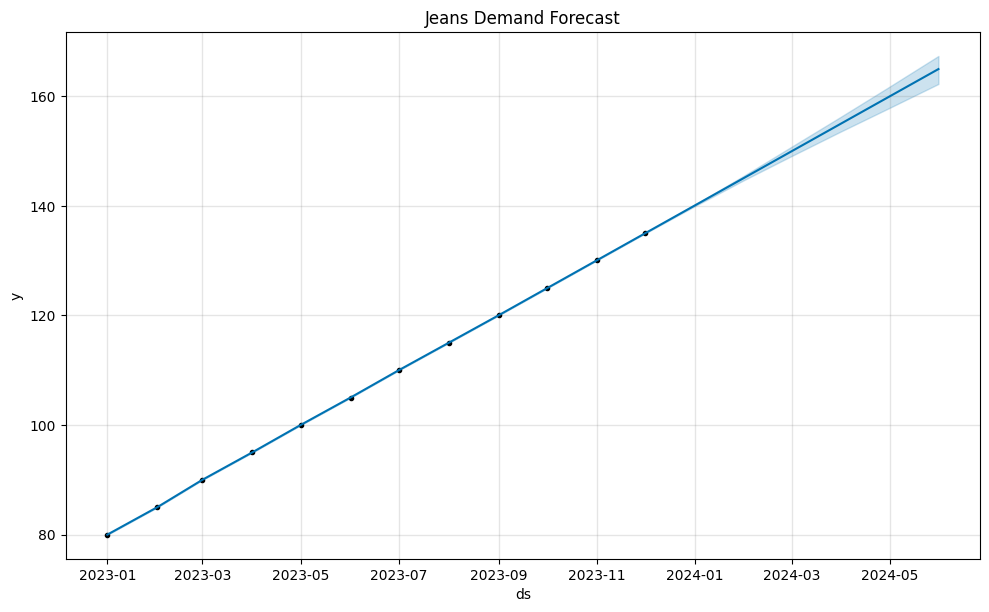

In [27]:
from prophet import Prophet

jeans = df[['Month', 'Jeans']].copy()
jeans.columns = ['ds','y']

j_model = Prophet(seasonality_mode='multiplicative')
j_model.fit(jeans)
j_future = j_model.make_future_dataframe(periods=6, freq='ME')

j_forecast = j_model.predict(j_future)
print(j_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

fig3 = j_model.plot(j_forecast)
plt.title("Jeans Demand Forecast")
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt3nygbwz/9xj06n8z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt3nygbwz/ulz3q02u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36021', 'data', 'file=/tmp/tmpt3nygbwz/9xj06n8z.json', 'init=/tmp/tmpt3nygbwz/ulz3q02u.json', 'output', 'file=/tmp/tmpt3nygbwz/prophet_modelp14msulm/prophet_model-20250327071631.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:16:31 - cmdstanpy - INFO - Chain [1] start processing
IN

          ds    y
0 2023-01-01  100
1 2023-02-01  120
2 2023-03-01  150
3 2023-04-01  130
4 2023-05-01  160
           ds
13 2024-01-31
14 2024-02-29
15 2024-03-31
16 2024-04-30
17 2024-05-31
           ds        yhat  yhat_lower  yhat_upper
13 2024-01-31  255.655177  245.798830  265.209297
14 2024-02-29  266.314561  257.001629  276.254208
15 2024-03-31  277.709075  267.945210  288.036197
16 2024-04-30  288.736024  279.680906  298.209072
17 2024-05-31  300.130538  289.732970  309.345628


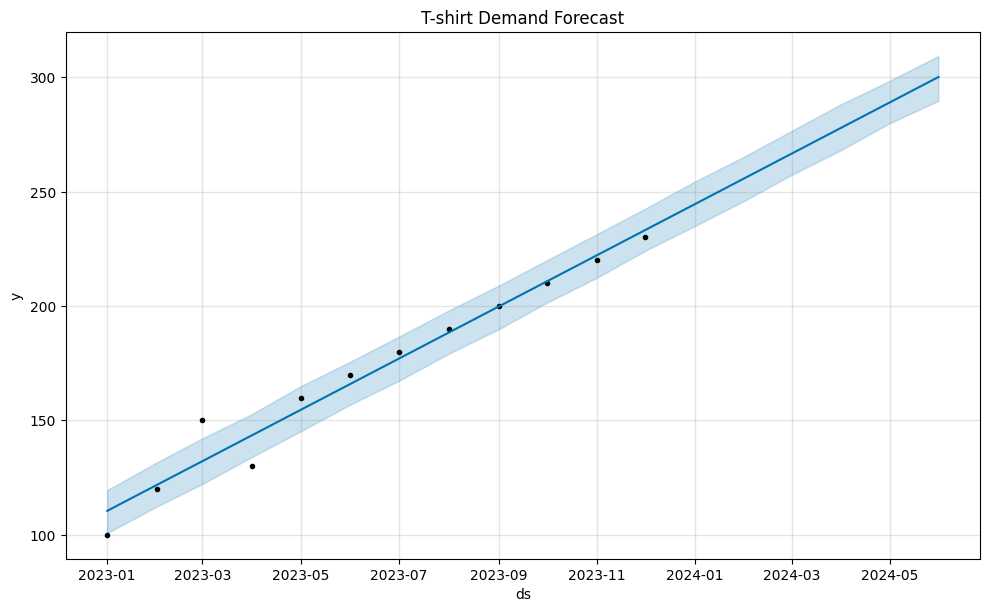

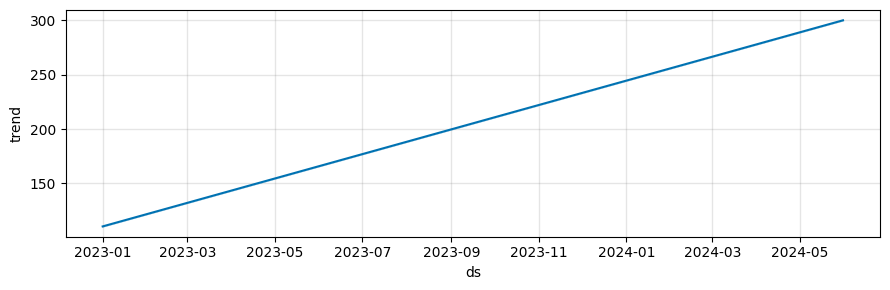

In [23]:
from prophet import Prophet

# Prepare T-shirt data (Prophet requires columns 'ds' and 'y')
tshirts = df[['Month', 'T-shirts']].copy()
tshirts.columns = ['ds', 'y']  # Rename columns
print(tshirts.head())

# Initialize model with weekly/yearly seasonality
model = Prophet(seasonality_mode='multiplicative')

# Fit the model to T-shirt data
model.fit(tshirts)

# Create future dataframe (6 months beyond last date)
future = model.make_future_dataframe(periods=6, freq='ME')  # 'ME' for monthly
print(future.tail())

# Make predictions
forecast = model.predict(future)

# View key columns
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot forecast to visualize
fig1 = model.plot(forecast)
plt.title("T-shirt Demand Forecast")
plt.show()

# Plot components (trend + seasonality)
fig2 = model.plot_components(forecast)
plt.show()

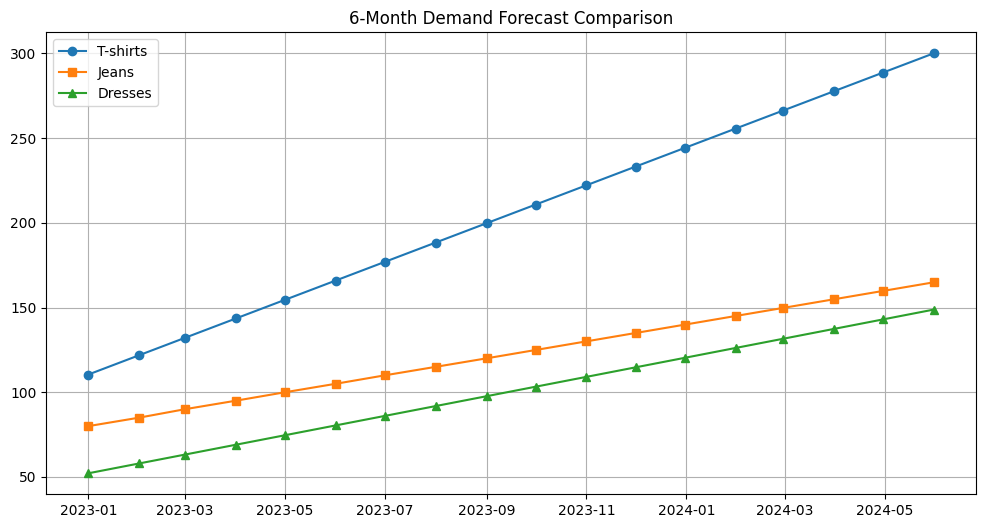

In [30]:
#Forecast for all 3 styles
plt.figure(figsize=(12,6))
plt.plot(forecast['ds'], forecast['yhat'], marker='o', label='T-shirts')
plt.plot(j_forecast['ds'], j_forecast['yhat'], marker='s', label='Jeans')
plt.plot(d_forecast['ds'], d_forecast['yhat'], marker='^', label='Dresses')

plt.legend()
plt.grid(True)
plt.title("6-Month Demand Forecast Comparison")
plt.show()

          ds        yhat    y
0 2024-01-31  255.655177  240
1 2024-02-29  266.314561  250
2 2024-03-31  277.709075  260
3 2024-04-30  288.736024  270
4 2024-05-31  300.130538  280
Mean Absolute Error (MAE): 17.71 units


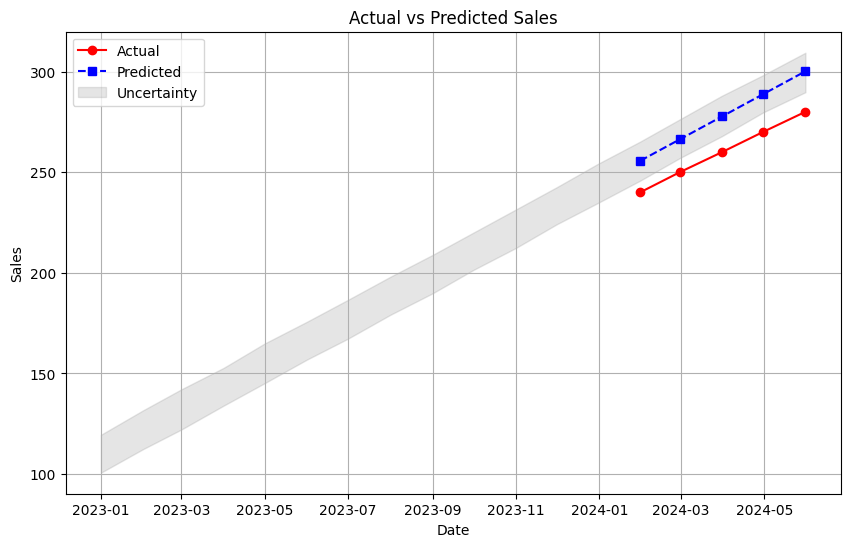


MSE: 316.23
R²: -0.5811



In [36]:
#MAE
# Sample actual data for 2024 (6 months)
actual_data = pd.DataFrame({
    'ds': pd.date_range(start='2024-01-01', periods=6, freq='ME'),
    'y': [240, 250, 260, 270, 280, 290]  # True T-shirt sales
})

# Select relevant columns from Prophet's forecast
predicted = forecast[['ds', 'yhat']].copy()

# Merge with actual data
comparison = pd.merge(predicted, actual_data, on='ds')
print(comparison)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(comparison['y'], comparison['yhat'])
print(f"Mean Absolute Error (MAE): {mae:.2f} units")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(comparison['ds'], comparison['y'], 'ro-', label='Actual')
plt.plot(comparison['ds'], comparison['yhat'], 'bs--', label='Predicted')
plt.fill_between(forecast['ds'],
                 forecast['yhat_lower'],
                 forecast['yhat_upper'],
                 alpha=0.2, color='gray', label='Uncertainty')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(comparison['y'], comparison['yhat'])

# R-squared
r2 = r2_score(comparison['y'], comparison['yhat'])

print(f"""
MSE: {mse:.2f}
R²: {r2:.4f}
""")